In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, array_to_img

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

4431872/4422102 [==============================] - 0s 0us/step


data loaded from tensorflow had train_images.shape  (60000,28,28) so converting them to (60000,784,1)


In [3]:
train_images = train_images.reshape((train_images.shape[0], 784, 1))
test_images = test_images.reshape((test_images.shape[0], 784, 1))

using np.dstack to further convert them into 3 channels

In [4]:
train_images=np.dstack([train_images] * 3)
test_images=np.dstack([test_images] * 3)


again reshaping for the format required by tensorflow

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 3))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 3))

Resize the images 48*48 as required by VGG16

In [6]:
train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_images])

normalizing data

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

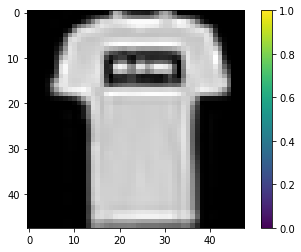

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

selecting VGG19 as the pretrained model


In [9]:
base_model = tf.keras.applications.VGG19(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights='imagenet')

80150528/80134624 [==============================] - 2s 0us/step


when training stopping VGG19 from training again 
as it pretrained

In [10]:
base_model.trainable = False

making the model

In [11]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='sigmoid'))

compiling and training the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Model training
history =  model.fit(train_images, train_labels, validation_data= (train_images[:6000], train_labels[:6000]), epochs=5 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 98s 36ms/step - loss: 0.6603 - accuracy: 0.7864 - val_loss: 0.4864 - val_accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4667 - accuracy: 0.8369 - val_loss: 0.4250 - val_accuracy: 0.8523
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4285 - accuracy: 0.8492 - val_loss: 0.4078 - val_accuracy: 0.8547
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4084 - accuracy: 0.8553 - val_loss: 0.3875 - val_accuracy: 0.8615
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3944 - accuracy: 0.8605 - val_loss: 0.3739 - val_accuracy: 0.8697
